Alumnos: Cristhian Rodríguez y Jesus Perucha


# 1. Preparar los datos para aplicar algoritmos de ML





In [3]:
import sys #only needed to determine Python version number

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

print("ok")

ok


## 1.1 Importamos las librerias que vamos a necesitar

In [5]:
# Realizamos la lectura del fichero y incluimos en el fichero el nombre de las columnas
names_features = [
'age',             # Edad del individuo: [17 - 90] media 38, 
'type_employer',   # Tipo de trabajo : [ State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked ]
'fnlwgt',          # Numero de personas encuestadas
'education',       # Nivel mas alto de educacion para el individuo
'education-num',   # Nivel mas alto de educacion en forma numerica [1 - 16]
'marital-status',  # Estado civil de la persona: [ Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed ]
'occupation',      # Ocupacion de la persona: [ Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, Sales, Craft-repair, Transport-moving, Farming-fishing, Machine-op-inspct, Tech-support, ?, Protective-serv, Armed-Forces, Priv-house-serv']
'relationship',    # Relacion familiar: [ Not-in-family, Husband, Wife, Own-child, Unmarried, Other-Relative]
'race',            # Raza de un individuo: [ White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other ]
'sex',             # Sexo de un individuo : [ Male, Female]
'capital_gain',    # Ganancias de capital : [ 0 - 99999 ]
'capital_loss',    # Perdidas de caapital : [ 0 - 4356 ]
'hours-per-week',  # Horas trabajadas por semana : [ 1 - 99 ]
'native-country',  # Pais de origen de la persona : [   ]
'income'           # Indica si una persona gana o no mas de 50.000        
]
df = pd.read_csv('adult.txt' , header=None, names=names_features)
df.head(3)
#print('ok')

,age,type_employer,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
columna_unica = df['native-country'].unique()

In [6]:
# Obtenemos las edades de las personas
edad = df['age']

# Hacemos una busqueda con las edades que pertenezcan a un rango
edad.where( edad < 30 ).where( edad > 18).count()
print('ok')
#",".join(ocupacion )

ok


# • Agrupa los países en grupos
  Agrupamos las personas por ciudad, Las que son de EEUU en uno y los que no son de EEUU en otro

In [7]:

def isEEUU(x):
     
    if x == ' United-States':
        return 1
    else :
        return 0
  
# Aplicamos una funcion a la columna, para convertir los valores en enumerados
enum_isEEUU = df["native-country"].apply(isEEUU)

# Cramos la nueva columna enum_isEEUU con los datos anteriores
df["enum_isEEUU"] = enum_isEEUU    
print('ok')

ok


# • Mapeamos las razas

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Mapea los valores unicos de type_employer a enumerados
le.fit(df["race"].unique())

# Muestra como lo ha mapeado
print(list(le.classes_))

# Aplicamos una funcion a la columna, para convertir los valores en enumerados
enum_razas = le.transform( df["race"])

# Cramos la nueva columna enum_razas con los datos anteriores
df["enum_razas"] = enum_razas

#muestra la inversa
#list(le.inverse_transform(df["enum_razas"].head()))
print('ok')

[' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White']
ok


# • Mapea el tipo de trabajo

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Mapea los valores unicos de type_employer a enumerados
le.fit(df["type_employer"].unique())

# Transformamos la columna type_employer con 'labelEncoder' en enumerados
enum_type_employer = le.transform( df["type_employer"])

# Cramos la nueva columna enum_type_employer con los datos anteriores
df["enum_type_employer"] = enum_type_employer
print('ok')

ok


# •  Mapea el tipo de familia

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df["relationship"].unique())

enum_relationship = le.transform( df["relationship"])

df["enum_relationship"] = enum_relationship

#muestra la inversa
#list(le.inverse_transform(df["enum_rel"].head()))
print('ok')

ok


# •  Mapea la ocupacion


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["occupation"].unique())
df["enum_occupation"] = le.transform( df["occupation"])
print('ok')

ok


# •  Mapea las ganancias (>50k o <=50k)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["income"].unique())

# Muestra como lo ha mapeado
print(list(le.classes_))

df["enum_income"] = le.transform( df["income"])
print('ok')

[' <=50K', ' >50K']
ok


# •  Mapea el sexo

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["sex"].unique())

# Muestra como lo ha mapeado
print(list(le.classes_))

df["enum_sex"] = le.transform( df["sex"])
print('ok')

[' Female', ' Male']
ok


# •  Mapea el estado civil de cada persona

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["marital-status"].unique())

# Muestra como lo ha mapeado
print(list(le.classes_))

df["enum_marital-status"] = le.transform( df["marital-status"])
print('ok')

[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']
ok


# 2. Haz visualizaciones de diferentes valores con seaborn.
Describe lo que ves en las visualizaciones

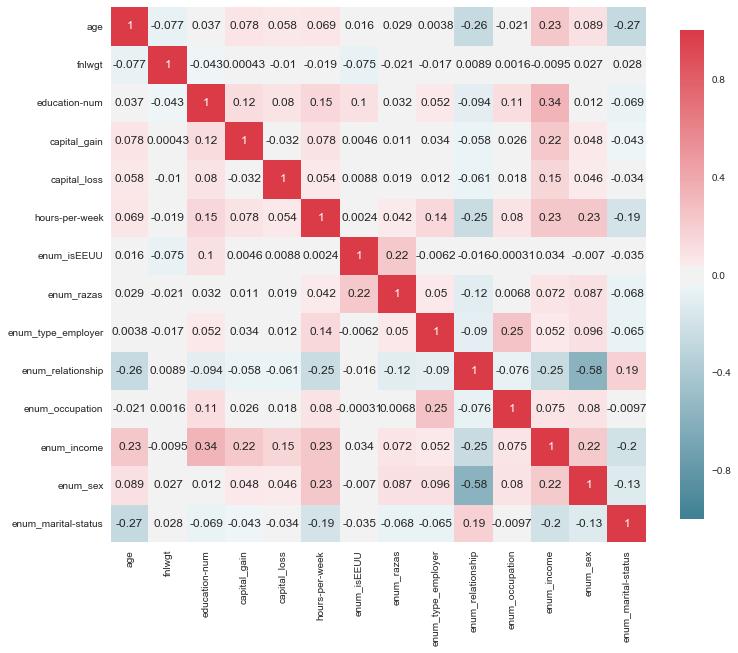

In [15]:
'''
2.2 Funcion que muestra la correlacion entre todas las features
'''
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map( df )

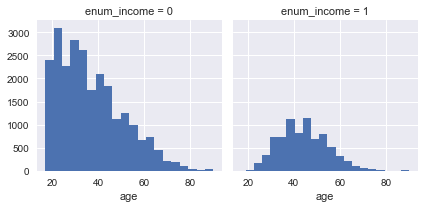

In [18]:
g = sns.FacetGrid(df, col='enum_income')
g.map(plt.hist, 'age', bins=20)

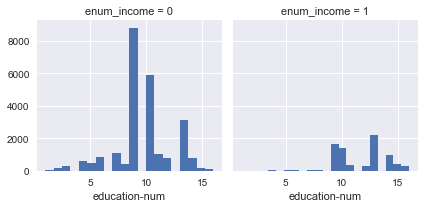

In [19]:
g = sns.FacetGrid(df, col='enum_income')
g.map(plt.hist, 'education-num', bins=20)

# 4. Utiliza random forest con diferentes parámetros, diferentes features, y cross_validation para conseguir el mejor modelo posible.

In [57]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# modelo
modelo = RandomForestClassifier(n_estimators=9, min_samples_split=2 ,min_samples_leaf =1, n_jobs = 49)

# Seleccionamos las features con las que vamos a usar el algoritmo
features = ["education-num","capital_gain","capital_loss","enum_marital-status","enum_occupation","enum_relationship"]

X = df[features]       # features
y = df["enum_income"]  # targets

#SCORE
scores = cross_val_score(modelo, X, y, cv = 5 )
print(scores.mean())


0.857651928236


In [96]:
from sklearn.grid_search import GridSearchCV
# define the parameter values that should be searched
N_estimators = list(range(1, 20))
Min_samples_split= list(range(2, 10))
Min_samples_leaf = list(range(1, 2))
N_jobs = list(range(1, 20))
print(Min_samples_leaf)
print(Min_samples_split)

[1]
[2, 3, 4, 5, 6, 7, 8, 9]


In [97]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=N_estimators, min_samples_split=Min_samples_split ,min_samples_leaf =Min_samples_leaf, n_jobs = N_jobs)

In [ ]:
# instantiate and fit the grid
grid = GridSearchCV(modelo, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

In [92]:

# view the complete results
grid.grid_scores_


[mean: 0.85169, std: 0.00168, params: {'min_samples_split': 2, 'n_estimators': 1, 'n_jobs': 1, 'min_samples_leaf': 1},
 mean: 0.85384, std: 0.00286, params: {'min_samples_split': 2, 'n_estimators': 1, 'n_jobs': 2, 'min_samples_leaf': 1},
 mean: 0.85289, std: 0.00210, params: {'min_samples_split': 2, 'n_estimators': 1, 'n_jobs': 3, 'min_samples_leaf': 1},
 mean: 0.85191, std: 0.00307, params: {'min_samples_split': 2, 'n_estimators': 1, 'n_jobs': 4, 'min_samples_leaf': 1},
 mean: 0.85274, std: 0.00355, params: {'min_samples_split': 2, 'n_estimators': 1, 'n_jobs': 5, 'min_samples_leaf': 1},
 mean: 0.85120, std: 0.00256, params: {'min_samples_split': 2, 'n_estimators': 1, 'n_jobs': 6, 'min_samples_leaf': 1},
 mean: 0.85332, std: 0.00365, params: {'min_samples_split': 2, 'n_estimators': 1, 'n_jobs': 7, 'min_samples_leaf': 1},
 mean: 0.85142, std: 0.00178, params: {'min_samples_split': 2, 'n_estimators': 1, 'n_jobs': 8, 'min_samples_leaf': 1},
 mean: 0.85154, std: 0.00362, params: {'min_samp